## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Importing the dataset

In [2]:
data=pd.read_csv("data_moods.csv")

In [3]:
print(data.shape)

(686, 19)


In [4]:
print(data.head())

                                          name                        album  \
0                                         1999                         1999   
1                                           23                           23   
2                                     9 Crimes                            9   
3                               99 Luftballons               99 Luftballons   
4  A Boy Brushed Red Living In Black And White  They're Only Chasing Safety   

           artist                      id release_date  popularity  length  \
0          Prince  2H7PHVdQ3mXqEHXcvclTB0   1982-10-27          68  379266   
1  Blonde Redhead  4HIwL9ii9CcXpTOTzMq0MP   2007-04-16          43  318800   
2     Damien Rice  5GZEeowhvSieFDiR8fQ2im   2006-11-06          60  217946   
3            Nena  6HA97v4wEGQ5TUClRM0XLc   1984-08-21           2  233000   
4       Underoath  47IWLfIKOKhFnz1FUEUIkE   2004-01-01          60  268000   

   danceability  acousticness  energy  instrumentalness 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [6]:
dict={}
for i in data.iloc[:,-1]:
  if i not in dict:
    dict[i]=1
  else:
    dict[i]+=1
print(dict)

{'Happy': 140, 'Sad': 197, 'Energetic': 154, 'Calm': 195}


In [7]:
index=['length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key', 'time_signature']
X=data[index].values
y=data.iloc[:,-1].values

## Taking care of missing data

In [8]:
print(data.isnull().sum())

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64


## Taking care of duplicate data

In [9]:
print(data.duplicated().sum())

0


### Encoding the Dependent Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [11]:
unique_values = np.unique(y)
for i in unique_values:
  print(i,encoder.classes_[i])

0 Calm
1 Energetic
2 Happy
3 Sad


## Splitting the dataset into the Training set and Test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(548, 12)
(138, 12)
(548,)
(138,)


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  KNN model

In [15]:
def distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def KNN(X,y,x,k):
    m=len(X)
    n=len(X[0])
    d=np.empty((m,2))
    for i in range(m):
        d1=[i,distance(X[i],x)]
        d[i]=d1
    d = d[d[:, 1].argsort()][:k]    # Sort d by distances and select top k
    y1 = [y[int(i[0])] for i in d]
    z=[]
    max=0
    for i in y1:
        z.append([i,y1.count(i)])
        if max<y1.count(i):
            pred_class=i
    return pred_class

In [16]:
y_pred = [KNN(X_train, y_train, x, 9) for x in X_test]

In [17]:
#  Evaluate the model
knn_accuracy=accuracy_score(y_test,y_pred)

#  Logistic Regression model

In [18]:
def sigmoid(z):
    res=1/(1+np.exp(-z))
    return res
def predict(beta, x_test):
    probabilities = sigmoid(np.dot(beta.T, x_test))
    return [1 if prob >= 0.5 else 0 for prob in probabilities]
def logistic_regression(x_train,y_train,epsilon,lernRate):
    n, p = x_train.shape
    beta = np.zeros(p)
    for _ in range(1000000):
        beta_old = beta.copy()
        z = np.dot(x_train, beta)
        predictions = sigmoid(z)
        residual = y_train - predictions
        delta = np.dot(x_train.T, residual) / n
        beta += lernRate * delta
        if np.linalg.norm(beta - beta_old) < epsilon:
            return beta
    return beta
b = np.ones(len(X_train))
#Bind that column into the training set as per the theory
x_train=np.column_stack((b,X_train))
lernRate=0.01
epsilon=0.01

In [19]:
#Invoke the model
beta = logistic_regression(x_train,y_train,epsilon,lernRate)

In [20]:
b = np.ones(len(X_test))
#Bind that column into the testing set as per the theory
x_test=np.column_stack((b,X_test))
#Do the prediction
y_pred=predict(beta,x_test.T)

In [21]:
# Evaluate the model
lr_accuracy = accuracy_score(y_test,y_pred)

#  Decision Tree model

In [22]:
# Initialize the Decision Tree Classifier with Entropy
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [23]:
# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [24]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [25]:
# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)

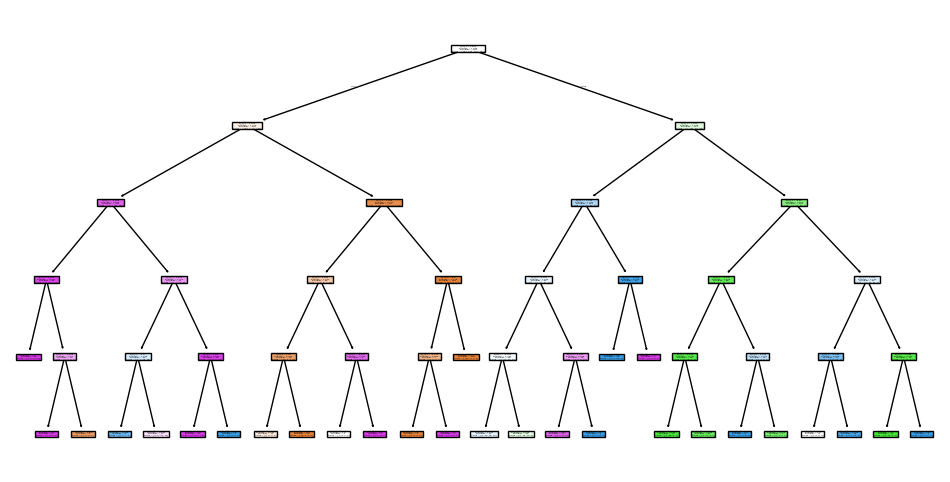

In [26]:
# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(dt_classifier, filled=True)
plt.show()

#  Random Forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=20,  # Number of decision trees
    criterion="entropy",   #Splitting criterion ("gini" or "entropy")
    max_depth=None,   # Maximum depth of each tree (None allows full growth)
    random_state=42)   # Random seed for reproducibility

In [28]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [29]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [30]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)

#  Gaussian Naive Bayes model

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [32]:
# Train the model
nb.fit(X_train, y_train)

GaussianNB()

In [33]:
# Make predictions on the test set
y_pred = nb.predict(X_test)

In [34]:
# Evaluate the model's performance
nb_accuracy = accuracy_score(y_test,y_pred)

#  SVM model

In [35]:
# Create an SVM classifier with a linear kernel
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear',random_state=42)

In [36]:
# Train the model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
# Predict the test set results
y_pred = svm_classifier.predict(X_test)

In [38]:
#  Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred)

In [39]:
table_data = {
    "Model": [
        "KNN",
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gaussian Naive Bayes",
        "SVM"
    ],
    "Accuracy (%)": [
        knn_accuracy * 100,
        lr_accuracy * 100,
        dt_accuracy * 100,
        rf_accuracy * 100,
        nb_accuracy * 100,
        svm_accuracy * 100
    ]
}
# Create DataFrame
table_df = pd.DataFrame(table_data)
print(table_df)

                  Model  Accuracy (%)
0                   KNN     71.014493
1   Logistic Regression     48.550725
2         Decision Tree     79.710145
3         Random Forest     78.985507
4  Gaussian Naive Bayes     77.536232
5                   SVM     76.811594


# Making Prediction

In [40]:
x=[0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55]
new_y = dt_classifier.predict([x])
print(new_y)

[3]


In [41]:
print(encoder.classes_[new_y])

['Sad']


# Recommending a playlist

In [42]:
songs=[]
for i in range(len(data)):
  if data.iloc[i,-1]==encoder.classes_[new_y]:
    print(data.iloc[i, 0])
    songs.append(data.iloc[i, 0])
print(len(songs))

23
9 Crimes
Algo Rhythm
Alison
All I Want
All Mirrors
All of Me
Anchor
Andromeda
Angel's Song
Ashes to Ashes
Bad Feeling
Bad Kingdom
Bad Timing
Ballad of the Dying Man
Be My Mistake
Before You Go
Better Than Today
Bird
Bison on the Plains
Black Car
Bloodbuzz Ohio
Bloom Innocent
Breathe Me
Bruises
Chariot
Cold Arms
Cold Nights
Consequences
Conversation
Creep
Cursive
Dancing On My Own
Dancing With Your Ghost
Dancing With an Astronaut
Dark Side of the Gym
Darkest Hour
Dear Diary
Desire Lines
Dive
Dolerme
Don’t Delete The Kisses
Dreams Tonite
Dust On The Ground
Easily
Eden - Hunted Version
Emotions in Motion
Everybody Hurts
Falling
Falling Ashes
Falling Asleep
Feels Like We're Dying
Fire in Cairo
Fix You
Fly - King Britt's Fhloston Paradigm Remix
Ghostride
Goodbye
Goshen
Harvest Love
Heavenly
How To Fight
Hunter
I Can't Help (with Sarcastic Sounds)
I Don't Know (feat. Samuel T. Herring)
I Took A Pill In Ibiza
I dine øjne
I'm Your Man
I've Been Fine
If You Think It's Love
Indigo
Into Black
